In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt




In [2]:
output_file_path = ""
count = 0 # count frame

In [3]:
def display(img, output_file_path=output_file_path):
    cv2.imwrite(output_file_path, img)
    plt.imshow(plt.imread(output_file_path))
    plt.axis('off')
    plt.show()


def akaze_extra_points(img):
    gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    akaze = cv2.AKAZE_create()
    kp1 = akaze.detect(gray1)
    img1_akaze = cv2.drawKeypoints(gray1, kp1, None, flags=4)

    display(img1_akaze, "./results/result_navisys_akaze.jpg")


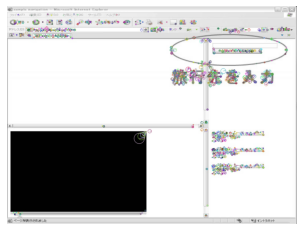

In [4]:
cap = cv2.VideoCapture('./videos/navisys.wmv')
# cap = cv2.VideoCapture('./videos/flog.m1v')

# Check if camera opened successfully
if (cap.isOpened() == False):
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  count += 1
  if ret == True:
    # Display the resulting frame

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & count == 10:
      cv2.imshow('input_image', frame)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      cv2.imwrite("./results/cap_navisys_frame.jpg", frame)
      akaze_extra_points(frame)
      break

  # Break the loop
  else:
    break
